## Notebook on Random Walks

In [2]:
import Pkg
Pkg.add(["Distributions","Random","Statistics","CairoMakie"])

   Resolving package versions...
   Installed Mods ───────────── v2.2.3
   Installed LinearAlgebraX ─── v0.2.6
   Installed StableHashTraits ─ v1.1.4
    Updating `~/.julia/environments/v1.10/Project.toml`
  [13f3f980] + CairoMakie v0.11.5
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [398f06c4] + AbstractLattices v0.3.0
  [1520ce14] + AbstractTrees v0.4.4
⌅ [79e6a3ab] + Adapt v3.7.2
  [27a7e980] + Animations v0.4.1
  [4fba245c] + ArrayInterface v7.7.0
  [67c07d97] + Automa v1.0.2
  [13072b0f] + AxisAlgorithms v1.1.0
  [39de3d68] + AxisArrays v0.4.7
  [fa961155] + CEnum v0.5.0
  [96374032] + CRlibm v1.0.1
  [159f3aea] + Cairo v1.0.5
  [13f3f980] + CairoMakie v0.11.5
  [d360d2e6] + ChainRulesCore v1.19.1
  [a2cac450] + ColorBrewer v0.4.0
  [861a8166] + Combinatorics v1.0.2
  [bbf7d656] + CommonSubexpressions v0.3.0
  [187b0558] + ConstructionBase v1.5.4
  [927a84f5] + DelaunayTriangulation v0.8.11
  [163ba53b] + DiffResults v1.1.0
  [b552c

In [4]:
using Distributions
using Random
using Statistics
using CairoMakie

In [12]:
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [13]:
x_list = [0.0]
for i in 1:999
    push!(x_list, x_list[end] + rand(nd))
end

In [14]:
x_list

1000-element Vector{Float64}:
  0.0
 -0.37862183969081165
  1.0195058335279974
  1.235216792966778
 -0.01937376600844365
 -1.0100708939018763
 -0.5791451947706372
 -0.04302054099570696
 -0.9035323076400306
 -1.5215472838446378
 -2.222463151127359
 -1.9306834876613745
 -1.1112820586461296
  ⋮
 -2.091033259473866
 -1.16025454362221
 -1.2927718600473501
 -2.5304839129167127
 -2.4718139229545666
 -2.881856928777119
 -2.340094466722174
 -1.7316555547724708
 -1.2719203608497487
 -1.3097298976050835
 -3.6971185622653655
 -2.0717768975248303

In [15]:
x_otherlist = rand(nd,999)

999-element Vector{Float64}:
 -2.9537661766048395
  1.1211083066281347
 -2.0139927703509795
 -0.2062447712920797
 -0.18069061664002822
  0.8013964531189849
  0.5241076462153519
 -1.1108626288186836
 -0.9089356405692105
  1.376520774729043
  0.7689542236454503
  0.10941682139770056
  1.2358480702043
  ⋮
 -0.5801935115370194
 -1.352048925554529
  1.236787850354631
 -1.2177046969987602
  0.9213369539606397
  0.04431313073459576
 -0.8628704918305826
 -0.6940740814064231
  1.631697567654884
 -0.8264466413909922
  0.3825084902352959
  1.0558468009236168

In [16]:
rw = pushfirst!(cumsum(x_otherlist),0)

1000-element Vector{Float64}:
  0.0
 -2.9537661766048395
 -1.8326578699767049
 -3.8466506403276846
 -4.0528954116197635
 -4.233586028259792
 -3.432189575140807
 -2.9080819289254554
 -4.018944557744139
 -4.92788019831335
 -3.551359423584306
 -2.782405199938856
 -2.6729883785411555
  ⋮
  1.644839591196134
  0.29279066564160505
  1.5295785159962358
  0.31187381899747546
  1.233210772958115
  1.2775239036927108
  0.41465341186212834
 -0.2794206695442947
  1.3522768981105893
  0.5258302567195972
  0.9083387469548931
  1.9641855478785102

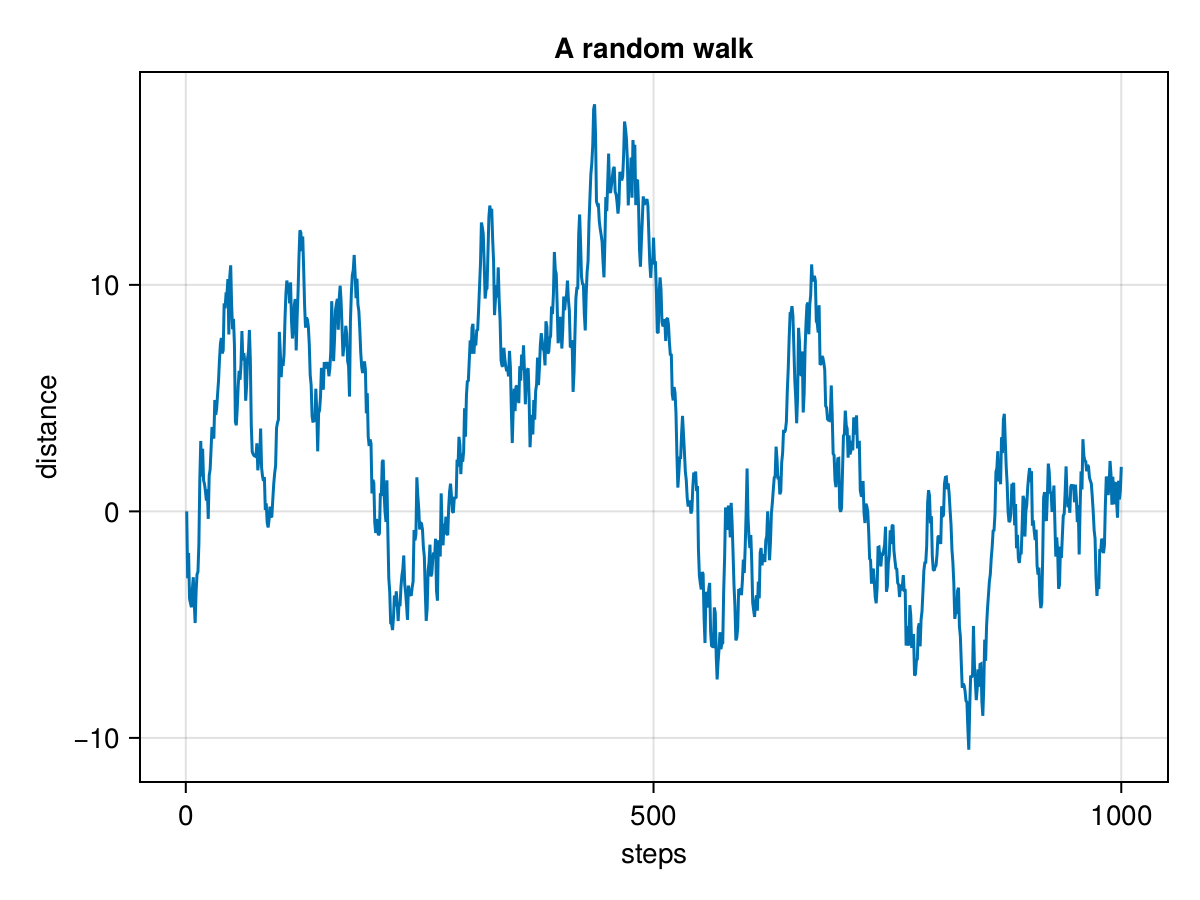

In [19]:
f = Figure()
ax = Axis(f[1,1],
    title="A random walk",
    xlabel="steps",
    ylabel="distance")
lines!(ax,rw)
f

In [24]:
rw_list = []
for i in 1:1000
    push!(rw_list,pushfirst!(cumsum(rand(nd,999)),0))
end

In [26]:
rw = reduce(hcat,rw_list)

1000×1000 Matrix{Float64}:
   0.0         0.0        0.0       …   0.0         0.0          0.0
  -0.0446266   0.109033   0.455211      0.203332   -0.322467    -0.202091
  -0.555162    1.53214    1.37895      -0.279804   -0.892222    -2.27867
  -1.25328     2.15085    1.08739       0.0166169  -2.1703      -3.72968
  -0.315677    2.42961   -0.169101     -0.737467   -0.320677    -3.93225
  -1.28096     1.95873   -0.294533  …  -0.224552   -0.00387711  -2.93454
  -3.06241     1.40179   -1.60324      -1.32849     0.489403    -4.572
  -3.70617     1.45034   -2.30382      -1.22202     0.602462    -3.57001
  -5.3761      0.89174   -2.16223      -0.663413    1.04342     -1.89041
  -7.28049     1.45756   -1.52485       2.21492     2.55064     -2.18051
  -6.74195     2.34121   -0.238554  …   3.47161     0.955086    -0.649476
  -6.80688     2.46799    1.91128       3.25761     1.30247     -1.23085
  -5.52608     4.04162    1.55101       2.03224     0.0547722   -1.07455
   ⋮                        

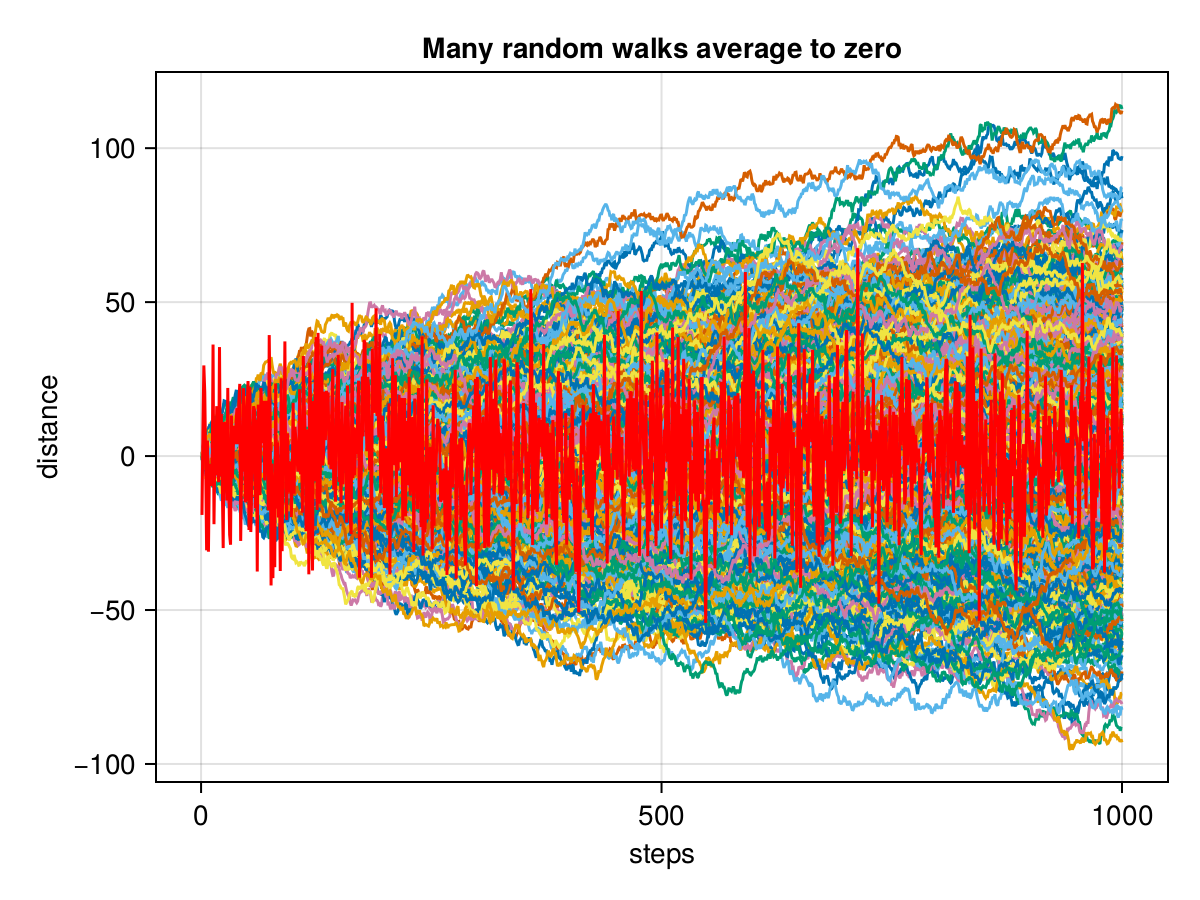

In [52]:
f = Figure()
ax = Axis(f[1,1],
            title="Many random walks average to zero",
            xlabel="steps",
            ylabel="distance")
for i in 1:size(rw)[2]
    lines!(ax,rw[:,i])
end
lines!(ax,vec(mean(rw,dims=1)),color=:red)
f

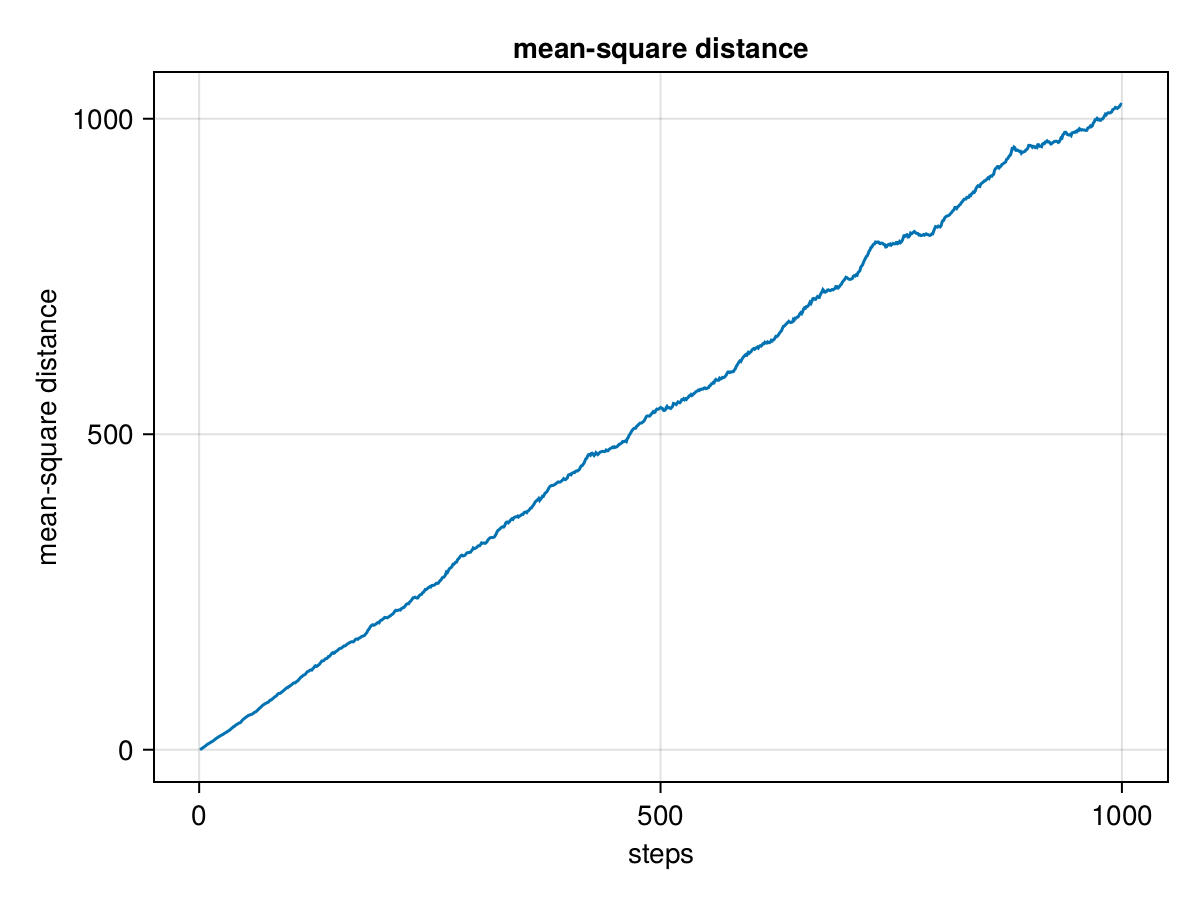

In [50]:
f = Figure()
ax = Axis(f[1,1],
        title="mean-square distance",
        xlabel="steps",
        ylabel="mean-square distance")
lines!(ax,vec(mean(rw.^2,dims=2)))
f